# Решение краевой задачи методом стрельбы
### $\begin{cases}
    \frac{d^2y}{dy^2} = f(x, y, \frac{dy}{dx}),
    \\
    y(x_0)=y_0,
    \\
    y(x_f)=y_f
\end{cases}$

### Мы переходим от краевой задачи к системе дифференциальных уравнений 1 порядка

### $\begin{cases}
       \begin{cases}
           \frac{dy}{dx}=z,\\
           y(x_{0})=y_{0}
       \end{cases}\\
   \begin{cases}
       \frac{dz}{dx}=f(x, y, z),\\
       y'(x_{0})=a
   \end{cases}
\end{cases}$

Зададим сразу параметры среды, в том числе точность вычислений $\epsilon$, и некоторые настройки $matplotlib$

In [69]:
import matplotlib.pyplot as plt
import numpy as np
import math

#-------------------------------------------------------

plt.style.use('classic')
plt.style.use('dark_background')

#-------------------------------------------------------

eps = 1e-5

### Зададим нашу краевую задачу
### $y''-2y'+y=0$ <br/> $\begin{cases}
    y(0)=0,
    \\
    y(1)=e
\end{cases}$

In [14]:
def f(x, y, z):
    return 2*z - y

Для данной краевой задачи функция
<b>$y(x)=xe^x$</b> является решением.

In [15]:
def solution(x):
    return x*math.e**x

Граничные условия имеют вид<br/>
$\begin{cases}
    y(0)=0,
    \\
    y(1)=e
\end{cases}$

Здесь<br/>
$x_0=0, y_0=0,$<br/>$x_f=1, y_f=e$

In [17]:
x_0 = 0
y_0 = 0
x_f = 1
y_f = math.e

Перейдём от краевой задачи к системе двух уравнений

$\begin{cases}
       \begin{cases}
           \frac{dy}{dx}=z,\\
           y(0)=0
       \end{cases}\\
   \begin{cases}
       \frac{dz}{dx}=2z - y,\\
       z(0)=a
   \end{cases}
\end{cases}$

где $a$ - какое-то неизвестное число, которые мы будет варьировать.

Напишем метод Ньютона для нахождения корня уравнения $F(x)=0$

In [58]:
def Newton_Method(f, df, x0, eps):
    """
    Ищет решение f(x)=0 методом Ньютона
    
    f - функция от x, для которой ищем решение
    df - производная по x от f
    x0 - начальная точка
    eps - погрешность
    
    returns:
    x, для которого abs(f(x)) < eps
    """
    
    while True:
        delta = abs(f(x0))
        if delta < eps:
            return x0
        x0 = x0 - f(x0)/df(x0)

Здесь $f$ — функция, для которой ищем корень, $df$ — её производная, $x_0$ — начальная точка для нахождения корня, $\epsilon$ — точность.

Напишем функцию "выстрела" для нашего метода

In [59]:
def Shooting(x0, x1, y0, a, n, function=f):
    """
    Рассчитывает один "выстрел" по методу стрельбы
    
    x0, x1 - диапазон x, на котором производится расчет
    y0 - y(x0)
    a - "угол выстрела", т.е. наклон касательной к y, т.е. y'(x0) = z(x0)
    n - количество точек, на котороые разбивается отрезок [x0, x1]
    function - вторая производная функции y (f в выражении y''= z = f(x, y, z))
    
    returns:
    конечное значение пули после выстрела, т.е. y(x1)
    
    """
    h = (x1 - x0) / n
    X = x0
    Y = y0
    Z = a
    for i in range(n):
        Y = Y + h * Z
        Z = Z + h * function(X, Y, Z)  
    return Y

Здесь $x_0$ — левая граница рассматриваемего отрезка, $x_1$ — правая граница, $y_0$ — значение функции в $x_0$, $a$ — варьируемое значение $y'(x_0)$, $n$ — количество делений отрезка $[x_0, x_1]$, $function$ — функция $f(x, y, z)$.

Далее реализуем сам метод стрельбы для нахождения значения $y'(x_0)$. Для этого будем использовать уже написанную функцию "выстрела" и функцию $dF$ - функцию для численного нахождения значенния производной в точке.

In [60]:
def Shooting_Method(x0, y0, x1, y1, function=f, eps=1e-3):
    """
    Поиск решение ОДУ методом стрельбы

    (x0, y0) - начальная точка
    (x1, y1) - конечная точка    
    function(x, y, z) - f, в выражении если y'' = z = f(x, y, z)
    eps = 1e-3 - погрешность
    
    return:
    Угол стрельбы, y'(x0)
    """
    
    def F(ksi):
        return Shooting(x_0, x_f, y_0, ksi, 1000, function) - y_f
    
    def dF(ksi):
        return (F(ksi+eps) - F(ksi)) / eps
    
    return Newton_Method(F, dF, x_0, eps)

$x_0$ — левая граница рассматриваемего отрезка, $x_1$ — правая граница, $y_0$ — значение функции в $x_0$, $y_1$ — значение функции в $x_1$, $function$ — функция $f(x, y, y')$, $\epsilon$ — допустимая погрешность.

Для визуализации полученного решения напишем функцию, которая будет рисовать соответствующие графики полученного и оригинального решения краевой задачи.

Полученное значение начального наклона: 1.0021663108506622


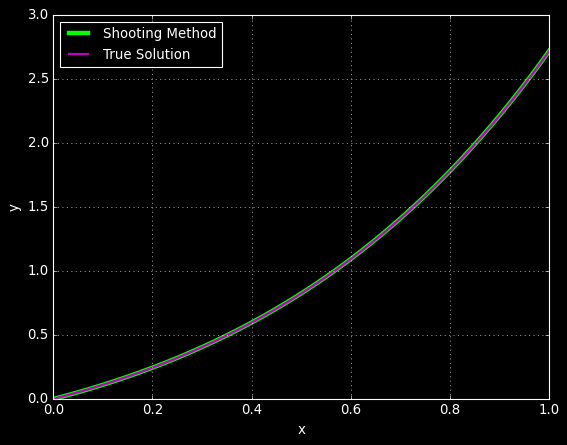

In [70]:
def Plot_Solutions(x0, x1, y0, y_prime, n, function=f):
    h = (x1 - x0) / n 
    
    X = np.linspace(x0, x1, n + 1) 
    Y = []
    Y.append(y0)
    Z = []
    Z.append(y_prime)
    
    for i in range(n):
        Y.append(Y[i] + h * Z[i])
        Z.append(Z[i] + h * function(X[i], Y[i], Z[i]))
    
    SOL = [solution(i) for i in X]  # Массив точных значений решения краевой задачи 
    
    plt.plot(X, Y, linewidth=4, color="lime", label="Shooting Method")                     # Строим полученное нами решение
    plt.plot(X, SOL, linewidth=2, color="m", linestyle="-", label="True Solution")  # Строим оригинальное решение
    
    plt.grid(True)
    plt.legend(loc="upper left", fontsize=12)
    plt.xlabel("x")
    plt.ylabel("y")
    
    return
    
y_prime_0 = Shooting_Method(x_0, y_0, x_f, y_f, f, eps)  # Находим значение угла, при котором наш выстрел будет успешным
print("Полученное значение начального наклона:", y_prime_0)
Plot_Solutions(x_0, x_f, y_0, y_prime_0, 1000, f)  # Строим графики решений

## Заключение
Как видно из графика, метод стрельбы крайне точно находит решение краевой задачи.